In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2.14 Com os dados da Tabela 2.7 relativos aos Estados Unidos nos período 1980-2006: a. Represente graficamente a relação entre a taxa de participação dos homens na força de trabalho civil e a taxa de desemprego civil dos homens. Trace, a olho, uma linha de regressão que passe pelos pontos. A priori, qual a relação esperada entre as duas variáveis e em que teoria econômica está embasada? O diagrama de dispersão respalda essa teoria?

Fonte: Economic Report of the President, 2007.
As citações abaixo se referem ao documento original.
1
TPFTCH, Taxa de participação na força de trabalho civil, homens (%), Tabela B-39, p.277.
2
TPFTCM, Taxa de participação na força de trabalho civil, mulheres (%), Tabela B-39, p.277.
3
TDCH, Taxa de desemprego civil, homens (%), Tabela B-42, p.280.
4
TDCM, Taxa de desemprego civil, mulheres (%), Tabela B-42, p.280.
5
GMH82, ganho médio por hora (em dólares de 1982), Tabela B-47, p.286.
6
GMH, ganho médio por hora (em dólares correntes), Tabela B-47, p.286

In [6]:
work = pd.read_excel("../dados/work_eua.xls")

In [8]:
work.dropna(inplace=True)

In [9]:
work.head()

,ano,TPFTCH2,TPFTCM,TDCH,TDCM,GMH,GMH82
5,1964,81.0,38.7,4.6,6.2,2.53,7.86
6,1965,80.7,39.3,4.0,5.5,2.63,8.04
7,1966,80.4,40.3,3.2,4.8,2.73,8.13
8,1967,80.4,41.1,3.1,5.2,2.85,8.21
9,1968,80.1,41.6,2.9,4.8,3.02,8.37


In [26]:
ano = work['ano'].values
homem_civil =  work['TPFTCH2'].values
mulher_civil = work['TPFTCM'].values
h_dolar = work['GMH82'].values

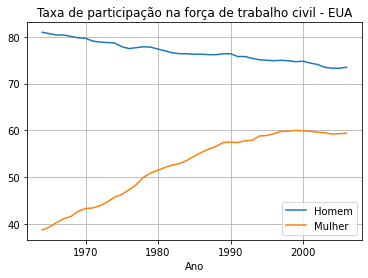

In [25]:
plt.plot(ano,homem_civil,ano,mulher_civil)
plt.grid(True)
plt.legend(['Homem','Mulher'])
plt.title('Taxa de participação na força de trabalho civil - EUA')
plt.xlabel('Ano')
plt.show()

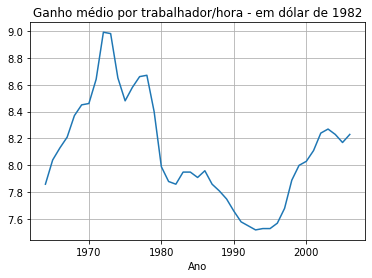

In [29]:
plt.plot(ano,h_dolar)
plt.grid(True)
plt.title('Ganho médio por trabalhador/hora - em dólar de 1982')
plt.xlabel('Ano')
plt.show()

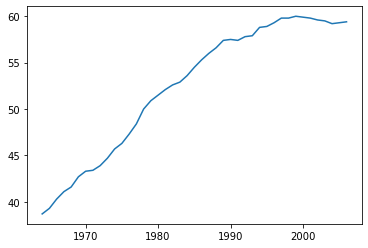

In [16]:
plt.plot(ano,mulher_civil)

## Exercício 3.22 - A Tabela 3.7 apresenta dados relativos a preços do ouro, índice de preços ao consumidor (IPC) e o índice Nyse da Bolsa de Valores de Nova York para o período 1974-2006. O índice Nyse inclui mais de 1.500 ações negociadas nessa bolsa

In [31]:
!pip install yahoo-finance

  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-py3-none-any.whl size=7232 sha256=5245a815ee9a268f3f0f71aa2c6cc1f1cc9a390fa901f65d99c60fa8164c35e2
  Stored in directory: c:\users\rober\appdata\local\pip\cache\wheels\80\c8\73\b05bf4d7f056ee7be447dedbc38e2acaf923e2c70828605f34
Successfully built yahoo-finance


In [35]:
!pip install pandas-datareader

In [37]:
import yfinance as yf
import pandas_datareader as pdr

In [92]:
gold = pdr.get_data_yahoo("GC=F", start="01/01/2000", end="01/01/2021", interval="mo")['Adj Close']
nyse = pdr.get_data_yahoo("^NYA", start="01/01/2000", end="01/01/2021", interval="mo")['Adj Close']

In [93]:
g_y = gold.groupby(pd.Grouper(freq='1Y')).mean()
n_y = nyse.groupby(pd.Grouper(freq='1Y')).mean()
icp = pd.read_excel("../dados/icp.xls",skiprows=3)

In [94]:
def inflacao(pais):
    x = icp[icp['Country Name']==pais].iloc[:,24:].T
    x.columns = [pais]
    x.index = x.index.astype(float)
    return x

In [118]:
eua = inflacao('United States')
eua2 = eua.loc[2000:].values.reshape(22)

In [130]:
uniao = pd.DataFrame([g_y.values,eua2,n_y.values]).T
uniao.columns = columns=['Gold','IPC','NYSE']
uniao.index = [i for i in range(2000,2022)]

In [186]:
def calculo(par):
    regr = LinearRegression()
    regr.fit(uniao['IPC'].values.reshape(-1,1), uniao[par].values.reshape(-1,1))
    a = regr.coef_[0][0]
    y_pred = regr.predict(uniao['IPC'].values.reshape(-1,1))
    r2 = r2_score(uniao[par].values.reshape(-1,1), y_pred)
    return {"alfa":a,"r2":r2}

a) Plote num mesmo gráfico a evolução do IPC, Ouro e NYSE pelo ano e depois do ouro por IPC e NYSE por IPC

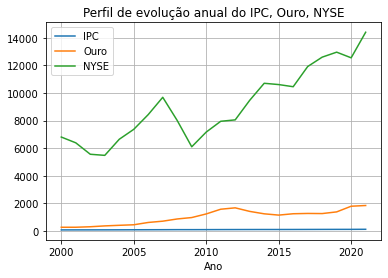

In [174]:
plt.plot(uniao.index, uniao.IPC, uniao.index, uniao.Gold, uniao.index, uniao.NYSE)
plt.title('Perfil de evolução anual do IPC, Ouro, NYSE')
plt.grid(True)
plt.legend(['IPC','Ouro','NYSE'])
plt.xlabel('Ano')
plt.show()

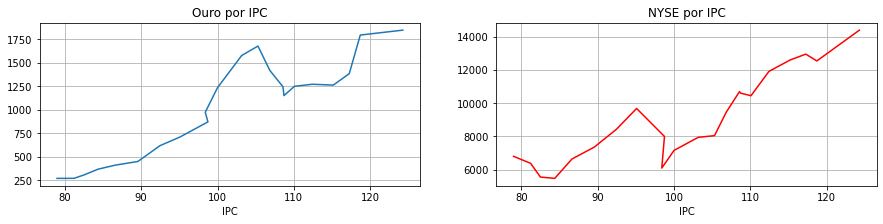

In [173]:
plt.figure(figsize=(15,3))
plt.subplot(1, 2, 1)
plt.plot(uniao.IPC, uniao.Gold)
plt.xlabel('IPC')
plt.title('Ouro por IPC')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(uniao.IPC, uniao.NYSE,'r')
plt.xlabel('IPC')
plt.title('NYSE por IPC')
plt.grid(True)
plt.show()

b) Supõe-se que um investimento funcione como proteção contra a inflação se seu preço e/ou 
sua taxa de retorno acompanha, pelo menos, a taxa de inflação. Para testar essa hipótese, 
ajuste o seguinte modelo, supondo que o diagrama de dispersão elaborado no item (a) sugiria que isso seja adequado:

Preço do ourot = beta + alfa*IPCt + erro

Índice NYSEt = beta + alfa*IPCt + erro

In [189]:
calculo('Gold')

{'alfa': 36.16746021291681, 'r2': 0.8499205448677033}

In [190]:
calculo('NYSE')

{'alfa': 180.0873594122483, 'r2': 0.8121627943543444}

## Conclusão

O NYSE sofre maior aumento sob efeito da inflação, conforme o cálculo de alfa, supondo a hipótese de seguir o modelo linear, entre 2000 e 2021

## 3.23 - a dados do produto interno bruto (PIB) dos Estados Unidos no período 1959-2005.

a) Represente graficamente os dados do PIB em dólares correntes e em dólares constantes (de 
2000) em relação ao tempo.

Fonte: Economic Report of the President, 2007. Tabelas B-1 e B-2

In [191]:
PIB = pd.read_excel("../dados/PIB.xls")

In [203]:
ind = [i for i in range(1,PIB.shape[0]+1)]
PIB.index = ind

In [204]:
PIB.head()

,Ano,PIB Nominal,PIB real
1,1959,506.6,2441.3
2,1960,526.4,2501.8
3,1961,544.7,2560.0
4,1962,585.6,2715.2
5,1963,617.7,2834.0


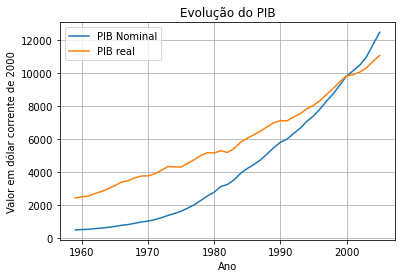

In [205]:
plt.plot(PIB.Ano, PIB['PIB Nominal'], PIB.Ano, PIB['PIB real'])
plt.grid(True)
plt.title('Evolução do PIB')
plt.legend(['PIB Nominal','PIB real'])
plt.xlabel('Ano')
plt.ylabel('Valor em dólar corrente de 2000')
plt.show()

b) Utilize o modelo linear para modelar o PIB por ano (considere o índice 1,2...até o fim)

In [206]:
def calculo2(par):
    regr = LinearRegression()
    regr.fit(PIB.index.values.reshape(-1,1), PIB[par].values.reshape(-1,1))
    a = regr.coef_[0][0]
    y_pred = regr.predict(PIB.index.values.reshape(-1,1))
    r2 = r2_score(PIB[par].values.reshape(-1,1), y_pred)
    return {"alfa":a,"r2":r2}

In [207]:
calculo2('PIB real')

{'alfa': 180.2630781683626, 'r2': 0.9718174118731091}

In [209]:
calculo2('PIB Nominal')

{'alfa': 252.57627197039776, 'r2': 0.9260480864370573}

R: O modelo é bem ajustado, tanto ao PIB real, como ao PIB nominal, com R2 superando a 0.9.

#### c) Como você interpretaria alfa?

R: O valor de alfa pode ser interpretado como a variação do PIB por ano

### Conceitos

PIB nominal: O PIB nominal considera somente os preços e valores de determinado produto ou serviço no momento em que foram produzidos

PIB real: O indicador mede o volume físico de um produto ou serviço, ou seja, desconsidera a inflação do momento em que o item ou serviço foi produzido.

#### d)Se existe diferença entre o alfa estimado para o PIB nominal e para o alfa estimado para o PIB real, o que explica essa diferença

Essa diferença decorre da metodologia de cálculo dos PIBs. O PIB nominal considera os produtos finais e serviços em valor absoluto. Portanto, se a inflação daquele ano for muito elevada, o PIB pode subir muito, sem representar um crescimento econômico de fato. O PIB real não considera efeito da inflação nos preços. Assim, no caso americano, a taxa anual de aumento do PIB nominal foi muito maior do que o real, indicando que a inflação foi mais pujante, responsável por esse maior aumento.